# J = 0 to 1 parameter scans - plots
Making plots for the data for the first step of SPA

## Import packages

In [67]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import uncertainties as uc

## Set plot parameters

In [68]:
plt.style.use(['seaborn-deep'])
# plt.style.use(['fivethirtyeight'])


# Font for labels
plt.rcParams['font.family'] = 'serif'

# Linewidths for plots
plt.rcParams['lines.linewidth'] = 1.6
plt.rcParams['lines.marker'] = 'x'

# Axes
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.grid'] = True


# Ticks
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Legend
plt.rcParams['legend.fontsize'] = 16

## Save folder

In [69]:
SAVE_DIR = "./saved_figs/J01/"

## Frequency scans
Start by getting data from file

In [70]:
fname = ('G:\My Drive\CeNTREX Oskari\State preparation\SPA\Data analysis\Analyzed Data'
         '\SPA_test_11_9_2021_analyzed.hdf')

run_name_freq_R0F2 = "1636486496 Scan SPA J = 0 to 1 microwave frequency"
df_freq_R0F2 = pd.read_hdf(fname, run_name_freq_R0F2)

run_name_freq_R1F3 = "1636493528 Accumulation on R(1), F = 3, SPA J = 0 to 1 microwave frequency scan"
df_freq_R1F3 = pd.read_hdf(fname, run_name_freq_R1F3)

### Plot depletion on R(0), F = 2

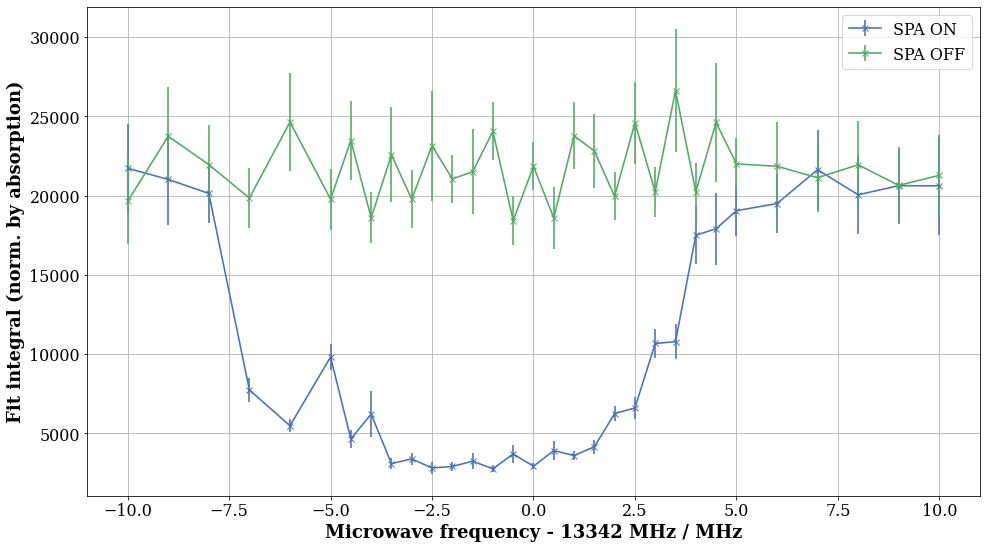

In [71]:
fig, ax = plt.subplots(figsize = (16,9))
ax.errorbar(df_freq_R0F2.SPAJ01Frequency/1e6 - 13342, df_freq_R0F2.IntegratedFluorescence_ON,
            yerr = df_freq_R0F2.IntegratedFluorescence_ON_err, label = 'SPA ON')
ax.errorbar(df_freq_R0F2.SPAJ01Frequency/1e6 - 13342, df_freq_R0F2.IntegratedFluorescence_OFF, 
            yerr = df_freq_R0F2.IntegratedFluorescence_OFF_err, label = 'SPA OFF')
ax.set_xlabel("Microwave frequency - 13342 MHz / MHz")
ax.set_ylabel("Fit integral (norm. by absorption)")
ax.legend()
fig.savefig(SAVE_DIR+"sig_size_J01_depl.pdf")

Text(0, 0.5, 'Remaining population in J = 0, F = 1')

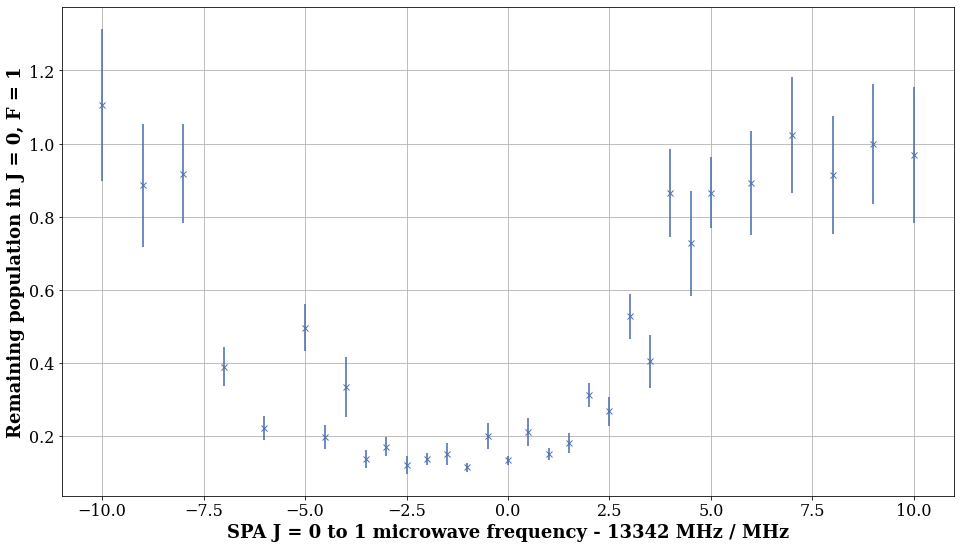

In [72]:
fig, ax = plt.subplots(figsize = (16,9))

df_freq_R0F2["pop_J0F1"] = df_freq_R0F2.IntegratedFluorescence_ON/df_freq_R0F2.IntegratedFluorescence_OFF
df_freq_R0F2["pop_J0F1_err"] = (np.sqrt(
                                (df_freq_R0F2.IntegratedFluorescence_ON_err/df_freq_R0F2.IntegratedFluorescence_ON)**2
                                + (df_freq_R0F2.IntegratedFluorescence_OFF_err/df_freq_R0F2.IntegratedFluorescence_OFF)**2)
                                * df_freq_R0F2.pop_J0F1)

ax.errorbar(df_freq_R0F2.SPAJ01Frequency/1e6 - 13342, df_freq_R0F2.pop_J0F1, df_freq_R0F2.pop_J0F1_err, marker = 'x', ls = '')
ax.set_xlabel("SPA J = 0 to 1 microwave frequency - 13342 MHz / MHz")
ax.set_ylabel("Remaining population in J = 0, F = 1")

### Plot accumulation on R(1), F = 3

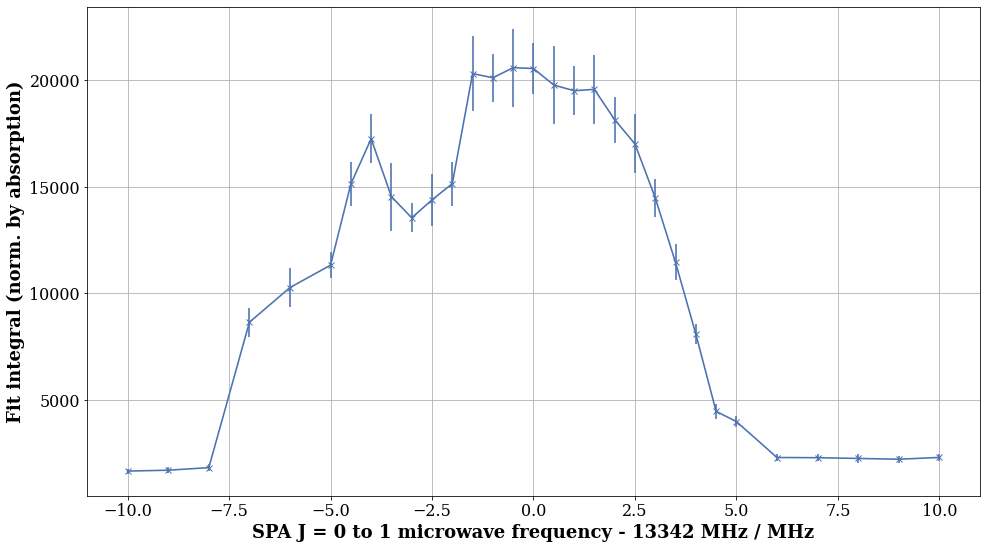

In [73]:
fig, ax = plt.subplots(figsize = (16,9))
ax.errorbar(df_freq_R1F3.SPAJ01Frequency/1e6 - 13342, df_freq_R1F3.IntegratedFluorescence, 
            yerr = df_freq_R1F3.IntegratedFluorescence_err, label = 'SPA ON', marker = 'x')
ax.set_xlabel("SPA J = 0 to 1 microwave frequency - 13342 MHz / MHz")
ax.set_ylabel("Fit integral (norm. by absorption)")
fig.savefig(SAVE_DIR+"sig_size_J01_accum.pdf")

### Depletion and accumulation together

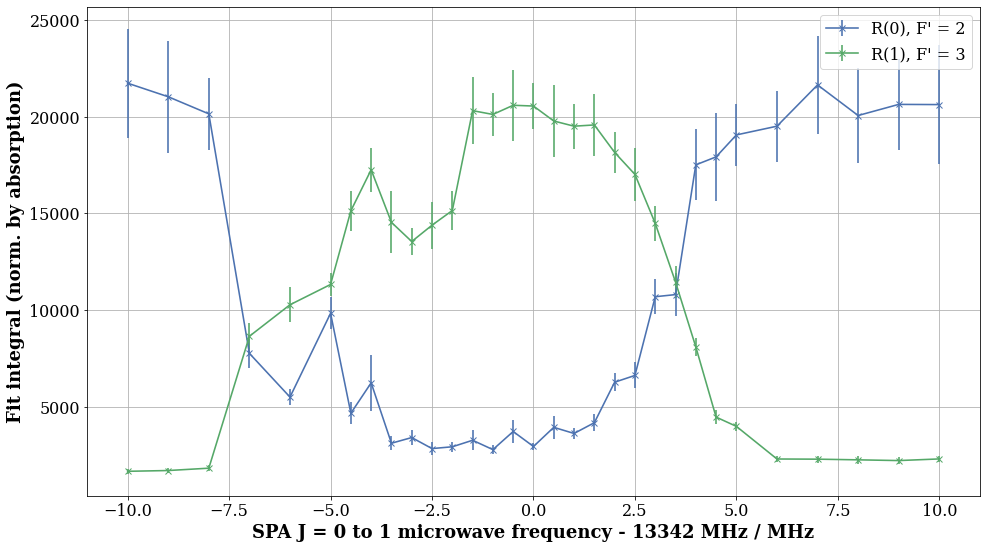

In [85]:
fig, ax = plt.subplots(figsize = (16,9))
ax.errorbar(df_freq_R0F2.SPAJ01Frequency/1e6 - 13342, df_freq_R0F2.IntegratedFluorescence_ON, 
            yerr = df_freq_R0F2.IntegratedFluorescence_ON_err, label = "R(0), F' = 2", marker = 'x')
ax.errorbar(df_freq_R1F3.SPAJ01Frequency/1e6 - 13342, df_freq_R1F3.IntegratedFluorescence, 
            yerr = df_freq_R1F3.IntegratedFluorescence_err, label = "R(1), F' = 3", marker = 'x')
ax.set_xlabel("SPA J = 0 to 1 microwave frequency - 13342 MHz / MHz")
ax.set_ylabel("Fit integral (norm. by absorption)")
ax.legend()
fig.savefig(SAVE_DIR+"sig_size_J01_accum_depl.pdf")

### SPA1 efficiency vs frequency

In [75]:
# Import uncertainties package for easily dealing with uncertainties
from uncertainties import ufloat
from uncertainties import unumpy as unp

In [76]:
# Define signal sizes
S_0_ON = unp.uarray(df_freq_R0F2.IntegratedFluorescence_ON,df_freq_R0F2.IntegratedFluorescence_ON_err)
S_0_OFF = unp.uarray(df_freq_R0F2.IntegratedFluorescence_OFF,df_freq_R0F2.IntegratedFluorescence_OFF_err)
S_1_ON = unp.uarray(df_freq_R1F3.IntegratedFluorescence,df_freq_R1F3.IntegratedFluorescence_err)
S_1_OFF = ufloat(np.mean(df_freq_R1F3[-4:].IntegratedFluorescence), 
                 np.sqrt(np.sum(df_freq_R1F3[-4:].IntegratedFluorescence_err**2))/2)

# Numbers of photons per molecule for each transition
n_gamma_0 = 1.92
n_gamma_1 = 2.10

# Calculate efficiency based on depletion
e01_dep = (1 - S_0_ON/S_0_OFF)/(1 - 3*n_gamma_0*S_1_OFF/(5*n_gamma_1*S_0_OFF))

# Calculate efficiency based on accumulation
e01_acc = 5/3 * (S_1_ON/S_1_OFF-1)/(5*n_gamma_1*S_0_OFF/(3*n_gamma_0*S_1_OFF) - 1)

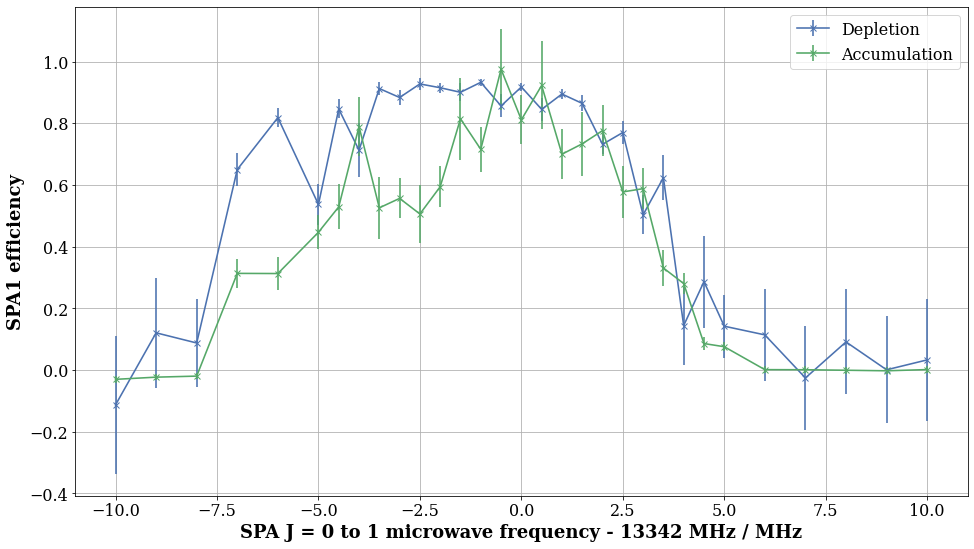

In [77]:
fig, ax = plt.subplots(figsize = (16,9))
ax.set_xlabel("SPA J = 0 to 1 microwave frequency - 13342 MHz / MHz")
ax.set_ylabel("SPA1 efficiency")
ax.errorbar(df_freq_R0F2.SPAJ01Frequency/1e6 - 13342, unp.nominal_values(e01_dep), 
            yerr = unp.std_devs(e01_dep), label = 'Depletion', marker = 'x')

ax.errorbar(df_freq_R0F2.SPAJ01Frequency/1e6 - 13342, unp.nominal_values(e01_acc), 
            yerr = unp.std_devs(e01_acc), label = 'Accumulation', marker = 'x')

ax.legend()
fig.savefig(SAVE_DIR+"J01_eff_vs_freq.pdf")

## Microwave power scans
Start by getting data from file

In [78]:
fname = ('G:\My Drive\CeNTREX Oskari\State preparation\SPA\Data analysis\Analyzed Data'
         '\SPA_test_11_9_2021_analyzed.hdf')

run_name_pow_R0F2 = "1636488188 Scan SPA J = 0 to 1 microwave power"
df_pow_R0F2 = pd.read_hdf(fname, run_name_pow_R0F2)

run_name_pow_R1F3 = "1636492543 Accumulation on R(1), F = 3, SPA J = 0 to 1 microwave power scan"
df_pow_R1F3 = pd.read_hdf(fname, run_name_pow_R1F3)

### Plot depletion on R(0), F = 2

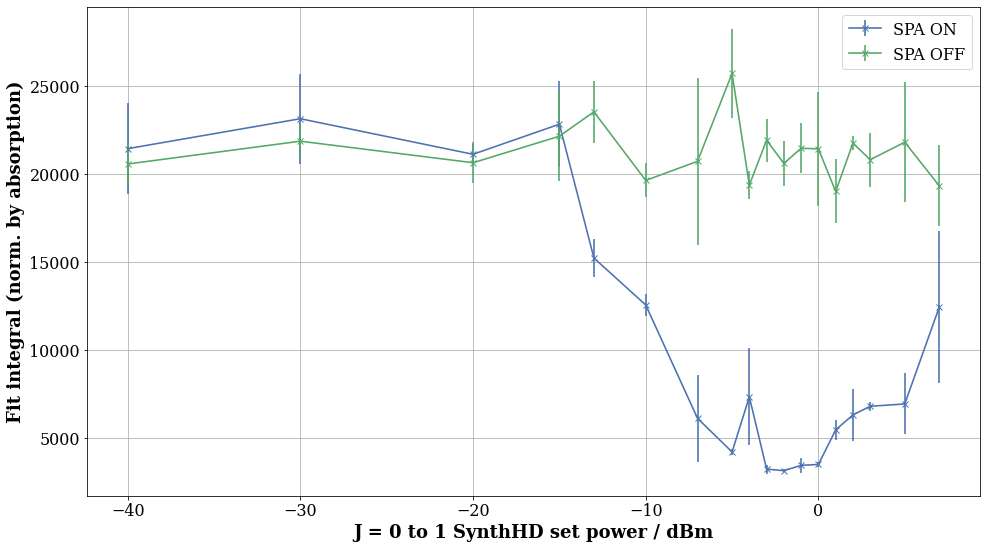

In [79]:
fig, ax = plt.subplots(figsize = (16,9))
ax.errorbar(df_pow_R0F2.SPAJ01Power, df_pow_R0F2.IntegratedFluorescence_ON,
            yerr = df_pow_R0F2.IntegratedFluorescence_ON_err, label = 'SPA ON')
ax.errorbar(df_pow_R0F2.SPAJ01Power, df_pow_R0F2.IntegratedFluorescence_OFF, 
            yerr = df_pow_R0F2.IntegratedFluorescence_OFF_err, label = 'SPA OFF')
ax.set_xlabel("J = 0 to 1 SynthHD set power / dBm")
ax.set_ylabel("Fit integral (norm. by absorption)")
ax.legend()
fig.savefig(SAVE_DIR+"sig_size_J01_depl_pow.pdf")

### Plot accumulation on R(1), F = 3

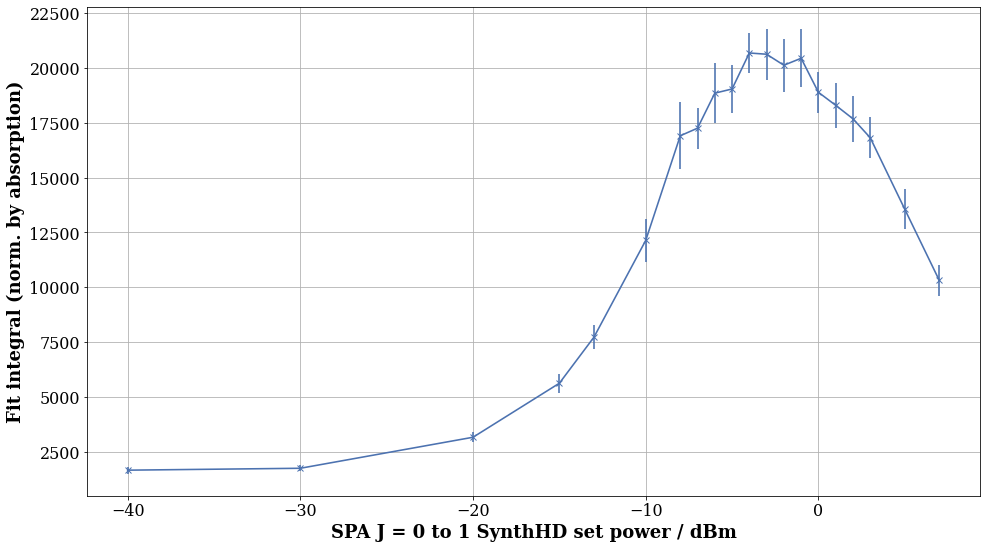

In [80]:
fig, ax = plt.subplots(figsize = (16,9))
ax.errorbar(df_pow_R1F3.SPAJ01Power, df_pow_R1F3.IntegratedFluorescence, 
            yerr = df_pow_R1F3.IntegratedFluorescence_err, label = 'SPA ON', marker = 'x')
ax.set_xlabel("SPA J = 0 to 1 SynthHD set power / dBm")
ax.set_ylabel("Fit integral (norm. by absorption)")
fig.savefig(SAVE_DIR+"sig_size_J01_accum_pow.pdf")

### Depletion and accumulation together

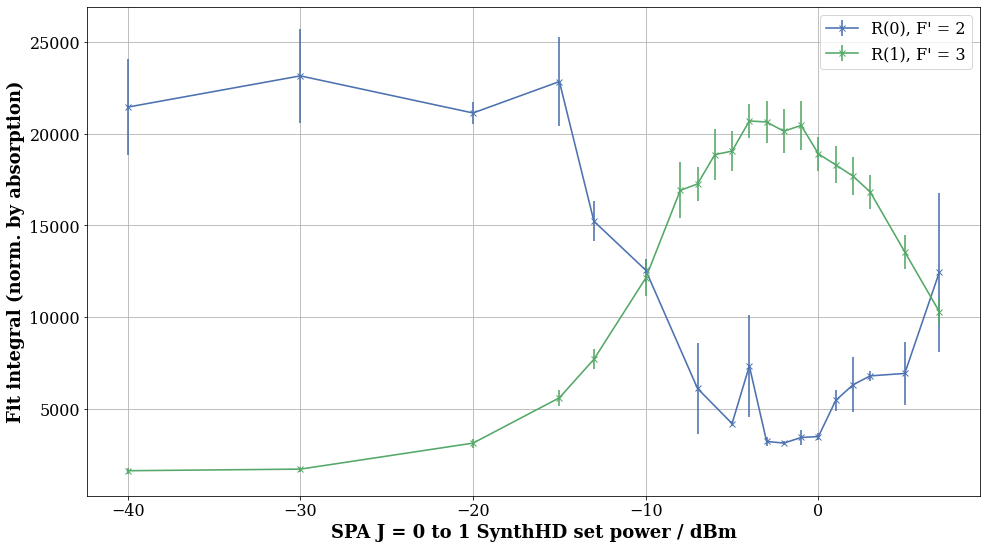

In [81]:
fig, ax = plt.subplots(figsize = (16,9))
ax.errorbar(df_pow_R0F2.SPAJ01Power, df_pow_R0F2.IntegratedFluorescence_ON, 
            yerr = df_pow_R0F2.IntegratedFluorescence_ON_err, label = "R(0), F' = 2", marker = 'x')
ax.errorbar(df_pow_R1F3.SPAJ01Power, df_pow_R1F3.IntegratedFluorescence, 
            yerr = df_pow_R1F3.IntegratedFluorescence_err, label = "R(1), F' = 3", marker = 'x')
ax.set_xlabel("SPA J = 0 to 1 SynthHD set power / dBm")
ax.set_ylabel("Fit integral (norm. by absorption)")
ax.legend()
fig.savefig(SAVE_DIR+"sig_size_J01_accum_depl_pow.pdf")

### SPA1 efficiency vs power

In [82]:
# Import uncertainties package for easily dealing with uncertainties
from uncertainties import ufloat
from uncertainties import unumpy as unp

In [83]:
# Find index for which values are in both data series
index = df_pow_R1F3.SPAJ01Power.isin(df_pow_R0F2.SPAJ01Power)

# Define signal sizes
S_0_ON = unp.uarray(df_pow_R0F2.IntegratedFluorescence_ON,df_pow_R0F2.IntegratedFluorescence_ON_err)
S_0_OFF = unp.uarray(df_pow_R0F2.IntegratedFluorescence_OFF,df_pow_R0F2.IntegratedFluorescence_OFF_err)
S_1_ON = unp.uarray(df_pow_R1F3.IntegratedFluorescence,df_pow_R1F3.IntegratedFluorescence_err)[index]
S_1_OFF = ufloat(np.mean(df_freq_R1F3[:2].IntegratedFluorescence), 
                 np.sqrt(np.sum(df_freq_R1F3[:2].IntegratedFluorescence_err**2))/np.sqrt(2))

# Numbers of photons per molecule for each transition
n_gamma_0 = 1.92
n_gamma_1 = 2.10

# Calculate efficiency based on depletion
e01_pow_dep = (1 - S_0_ON/S_0_OFF)/(1 - 3*n_gamma_0*S_1_OFF/(5*n_gamma_1*S_0_OFF))

# Calculate efficiency based on accumulation
e01_pow_acc = 5/3 * (S_1_ON/S_1_OFF-1)/(5*n_gamma_1*S_0_OFF/(3*n_gamma_0*S_1_OFF) - 1)

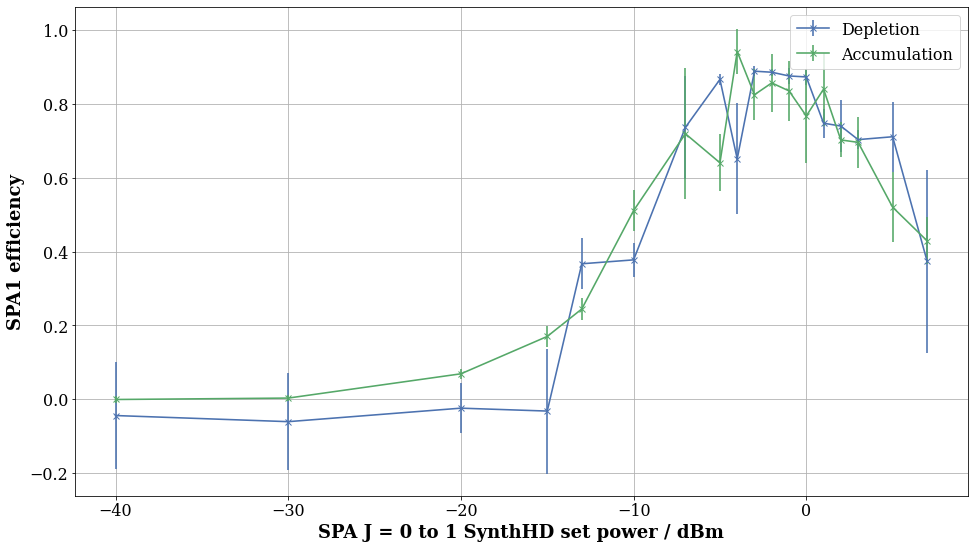

In [84]:
fig, ax = plt.subplots(figsize = (16,9))
ax.set_xlabel("SPA J = 0 to 1 SynthHD set power / dBm")
ax.set_ylabel("SPA1 efficiency")
ax.errorbar(df_pow_R0F2.SPAJ01Power, unp.nominal_values(e01_pow_dep), 
            yerr = unp.std_devs(e01_pow_dep), label = 'Depletion', marker = 'x')

ax.errorbar(df_pow_R0F2.SPAJ01Power, unp.nominal_values(e01_pow_acc), 
            yerr = unp.std_devs(e01_pow_acc), label = 'Accumulation', marker = 'x')

ax.legend()
fig.savefig(SAVE_DIR+"J01_eff_vs_pow.pdf")